In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 69% 113M/163M [00:00<00:00, 1.18GB/s]
100% 163M/163M [00:00<00:00, 1.09GB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1046.jpg', 'with_mask_3641.jpg', 'with_mask_1550.jpg', 'with_mask_2788.jpg', 'with_mask_1995.jpg']
['with_mask_3257.jpg', 'with_mask_688.jpg', 'with_mask_3447.jpg', 'with_mask_1519.jpg', 'with_mask_2130.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1647.jpg', 'without_mask_3056.jpg', 'without_mask_1902.jpg', 'without_mask_3609.jpg', 'without_mask_882.jpg']
['without_mask_1028.jpg', 'without_mask_2788.jpg', 'without_mask_118.jpg', 'without_mask_1780.jpg', 'without_mask_2879.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [10]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


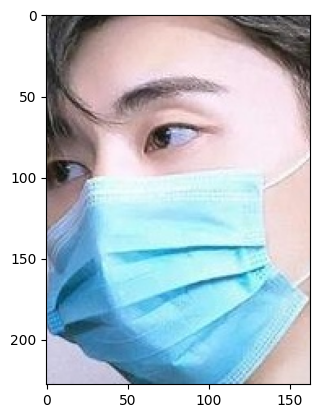

In [14]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

In [15]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
data[0].shape

(128, 128, 3)

In [18]:
X = np.array(data)
Y = np.array(labels)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [21]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(keras.layers.MaxPool2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [23]:
history = model.fit(X_train, Y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - acc: 0.5680 - loss: 29.0033 - val_acc: 0.6661 - val_loss: 0.6551
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.6186 - loss: 0.6764 - val_acc: 0.6281 - val_loss: 0.6427
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.6420 - loss: 0.6425 - val_acc: 0.6331 - val_loss: 0.6571
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.6963 - loss: 0.5835 - val_acc: 0.6793 - val_loss: 0.6098
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.7043 - loss: 0.5811 - val_acc: 0.6579 - val_loss: 0.6260


In [24]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.4969 - loss: 0.6945


In [25]:
accuracy

0.508272647857666